# SNLP Assignment 6 - Text Classification

Name 1: William LaCroix<br/>
Student id 1: 7038732<br/>
Email 1: williamplacroix@gmail.com<br/>


Name 2: Nicholas Jennings<br/>
Student id 2: 2573492<br/>
Email 2: s8nijenn@stud.uni-saarland.de<br/>

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook and the respective Python files for any additional exercises necessary. There is no need to submit the data files should they exist. <br/>
Upload the zipped folder on CMS. Only one member of the group should make the submisssion.

---

## <span style="color:red">Sentiment Analysis</span>

   - Use the [FinancialPhraseBank](https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news) corpus with a 80:20 train test split, with a) a naive bayes b) XGBoost classifier for sentiment analysis (**2 points**)

      - Naive Bayes: https://scikit-learn.org/stable/modules/naive_bayes.html

      - XGBoost: https://xgboost.readthedocs.io/en/stable/index.html

      - <span style="color:red">Note:</span> Only use all_data.csv file for your experiments

   - Use [LoughranMcDonald master dictionary](https://drive.google.com/file/d/17CmUZM9hGUdGYjCXcjQLyybjTrcjrhik/view?usp=sharing) to get word level polarity, replace words with the their corresponding polarity and now repeat the same classification task as above (**4 points**)

      - What happens if you remove the stop words? 

      - What's the ratio of stopwords (taken from NLTK) amongst the total word count? 

      - Is it a good choice to do stopword removal? Explain with 2-3 examples why or why not?
   
   - Create cascaded Bi-Grams and tri-grams and repeat both the exercises from above. Which representation do you think is a better value in terms of accuracy and computational power required? (**3 points**)

      - Bi-grams example: 

         - Company A barely surpassed their profit expectations.
         
         - (Company, A), (A, barely), (barely, surpassed), (surpassed, their) ...
   
   - How would you represnt the polarity in uni/bi/tri-gram models with Huffman Encoding? (**1 point**)


### Few points to remember
   - While splitting your dataset, use seed=42
   - Use type hint(s) in your code, and add a docstring to your functions or classes
   - Focus on the readability of your code, that helps us to give you better feedback on where the code went wrong
   - <span style="color:red">Do not submit the data or dictionary file.</span>

### Discussion:

- What happens if you remove the stop words?
    - Answer: For Naive Bayes removing stop words has no effect on accuracy, but there is an improvement of 0.06 for precision, 0.08 for recall and 0.07 for F1. For XGBoost removing improves accuracy by 0.01, precision by 0.01, recall by 0.02, and F1 by 0.02. For both models removing stopwords improves, however it is much more significant for Naive Bayes.

- What's the ratio of stopwords (taken from NLTK) amongst the total word count? 
    - Answer: 35346 stopwords out of 99315 total words were removed (approx. 35.6% of total words)

- Is it a good choice to do stopword removal? Explain with 2-3 examples why or why not?
    - Answer: In general, removing stop words is good choice. For example give the following sentence with positive sentiment: "The chain posted sales of 298 million euros for full 2005 , a rise of 19.5 percent , year-on-year ."
    Common words such as "the", "in", etc. that are in the NLTK english stopword list don't provide any information about the sentiment of the sentence, so removing them is the correct choice.
    But given the negative sentence: "Bosse added that Trygvesta does not have the financial strength to acquire the entire unit"
    Removing the word "not", which appears in the NLTK stopword list would have negative consequences for sentiment analysis as removing it changes the meaning of the sentence.

  
- How would you represnt the polarity in uni/bi/tri-gram models with Huffman Encoding? (**1 point**)
    - Answer: In the unigram case the polarity of a word would be equivalent to a character that is to be encoded. For bi/trigrams etc. each unique polarity ngram would represent a character.  The first step would to compute the frequency of all polarity ngrams and sort them by frequency. Assuming we are dealing with unigrams and that the polarities are ranked as follows by frequency: 1.Neutral 2.Positive 3.Negative, Neutral would be encoded as 0, Positive as 11 and Negative 10. For higher order ngrams the same principal would apply, with the difference being that vocabulary size scales by 3^n for n-grams of order n.


In [94]:
import solution
from importlib import reload
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt

results_table = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

In [95]:
# 1. Unigram Naive Bayes, unpolarized -> baseline NB
solution = reload(solution)
classification_model = MultinomialNB()
corpus = solution.load_and_preprocess_data()

y_test, y_pred = solution.train_and_fit_model(corpus, classification_model)

# Get the confusion matrix from solution.py file, since it's a multi-class classification
# Confusion matrix should give you a better idea of how well your model is performing
# Naive Bayes classification of 3 class labels
# NB_confusion_matrix on 3x3 matrix
confusion_matrix = solution.calculate_confusion_matrix(y_test, y_pred)
print(confusion_matrix)
results = solution.test(confusion_matrix, classifier="NB", preprocessing="Baseline")
results_table = results_table.append(results, ignore_index=True)

Predicted  Negative  Neutral  Positive
True                                  
Negative         53       33        24
Neutral          11      502        58
Positive         10      115       164

Baseline NB accuracy: 0.74
Baseline NB precision: 0.57
Baseline NB recall: 0.74
Baseline NB F1: 0.64


In [96]:
# 2. Unigram XGBoost, unpolarized -> baseline XGBoost
solution = reload(solution)
classification_model = XGBClassifier()
corpus = solution.load_and_preprocess_data()

y_test, y_pred = solution.train_and_fit_model(corpus, classification_model)

# Get the confusion matrix from solution.py file
confusion_matrix = solution.calculate_confusion_matrix(y_test, y_pred)
print(confusion_matrix)
results = solution.test(confusion_matrix, classifier="XGB", preprocessing="Baseline")
results_table = results_table.append(results, ignore_index=True)

Predicted  Negative  Neutral  Positive
True                                  
Negative         71       31         8
Neutral          11      541        19
Positive          4      123       162

Baseline XGB accuracy: 0.80
Baseline XGB precision: 0.56
Baseline XGB recall: 0.81
Baseline XGB F1: 0.66


In [97]:
# 3. Unigram Naive Bayes, polarized, include stop words
solution = reload(solution)
classification_model = MultinomialNB()
corpus = solution.load_and_preprocess_data(polarize=True)

y_test, y_pred = solution.train_and_fit_model(corpus, classification_model)

# Get the confusion matrix from solution.py file
confusion_matrix = solution.calculate_confusion_matrix(y_test, y_pred)
print(confusion_matrix)
results = solution.test(confusion_matrix, classifier="NB", preprocessing="Pol, n=1 +SW")
results_table = results_table.append(results, ignore_index=True)

Predicted  Negative  Neutral  Positive
True                                  
Negative          7       84        19
Neutral          18      527        26
Positive         15      234        40

Pol, n=1 +SW NB accuracy: 0.59
Pol, n=1 +SW NB precision: 0.14
Pol, n=1 +SW NB recall: 0.28
Pol, n=1 +SW NB F1: 0.19


In [98]:
# 4. Unigram Naive Bayes, polarized, exclude stop words
solution = reload(solution)
classification_model = MultinomialNB()
corpus = solution.load_and_preprocess_data(remove_stops=True, polarize=True)

y_test, y_pred = solution.train_and_fit_model(corpus, classification_model)

# Get the confusion matrix from solution.py file
confusion_matrix = solution.calculate_confusion_matrix(y_test, y_pred)
print(confusion_matrix)
results = solution.test(confusion_matrix, classifier="NB", preprocessing="Pol, n=1, -SW")
results_table = results_table.append(results, ignore_index=True)

total word count: 99315
removed stopword count: 35346
ratio 0.3558979006192418
Predicted  Negative  Neutral  Positive
True                                  
Negative         11       93         6
Neutral          21      537        13
Positive         23      242        24

Pol, n=1, -SW NB accuracy: 0.59
Pol, n=1, -SW NB precision: 0.08
Pol, n=1, -SW NB recall: 0.20
Pol, n=1, -SW NB F1: 0.12


In [99]:
# 5. Unigram XGBoost, polarized, include stop words
solution = reload(solution)
classification_model = XGBClassifier()
corpus = solution.load_and_preprocess_data(polarize=True)

y_test, y_pred = solution.train_and_fit_model(corpus, classification_model)

# Get the confusion matrix from solution.py file
confusion_matrix = solution.calculate_confusion_matrix(y_test, y_pred)
print(confusion_matrix)
results = solution.test(confusion_matrix, classifier="XGB", preprocessing="Pol, n=1, +SW")
results_table = results_table.append(results, ignore_index=True)

Predicted  Negative  Neutral  Positive
True                                  
Negative          9       81        20
Neutral          11      529        31
Positive         18      225        46

Pol, n=1, +SW XGB accuracy: 0.60
Pol, n=1, +SW XGB precision: 0.16
Pol, n=1, +SW XGB recall: 0.31
Pol, n=1, +SW XGB F1: 0.21


In [100]:
# 6. Unigram XGBoost, polarized, exclude stop words
solution = reload(solution)
classification_model = XGBClassifier()
corpus = solution.load_and_preprocess_data(remove_stops=True, polarize=True)

y_test, y_pred = solution.train_and_fit_model(corpus, classification_model)

# Get the confusion matrix from solution.py file
confusion_matrix = solution.calculate_confusion_matrix(y_test, y_pred)
print(confusion_matrix)
results = solution.test(confusion_matrix, classifier="XGB", preprocessing="Pol, n=1, -SW")
results_table = results_table.append(results, ignore_index=True)

total word count: 99315
removed stopword count: 35346
ratio 0.3558979006192418
Predicted  Negative  Neutral  Positive
True                                  
Negative          5       82        23
Neutral           6      521        44
Positive         12      235        42

Pol, n=1, -SW XGB accuracy: 0.59
Pol, n=1, -SW XGB precision: 0.15
Pol, n=1, -SW XGB recall: 0.29
Pol, n=1, -SW XGB F1: 0.19


In [101]:
# 7. Bigram Naive Bayes, polarized, include stop words
solution = reload(solution)
classification_model = MultinomialNB()
corpus = solution.load_and_preprocess_data(polarize=True, ngramize=2)

y_test, y_pred = solution.train_and_fit_model(corpus, classification_model)

# Get the confusion matrix from solution.py file
confusion_matrix = solution.calculate_confusion_matrix(y_test, y_pred)
print(confusion_matrix)
results = solution.test(confusion_matrix, classifier="NB", preprocessing="Pol, n=2, +SW")
results_table = results_table.append(results, ignore_index=True)

Predicted  Negative  Neutral  Positive
True                                  
Negative         23       69        18
Neutral          36      493        42
Positive         51      204        34

Pol, n=2, +SW NB accuracy: 0.57
Pol, n=2, +SW NB precision: 0.12
Pol, n=2, +SW NB recall: 0.28
Pol, n=2, +SW NB F1: 0.17


In [102]:
# 8. Bigram Naive Bayes, polarized, exclude stop words
solution = reload(solution)
classification_model = MultinomialNB()
corpus = solution.load_and_preprocess_data(remove_stops=True, polarize=True, ngramize=2)

y_test, y_pred = solution.train_and_fit_model(corpus, classification_model)

# Get the confusion matrix from solution.py file
confusion_matrix = solution.calculate_confusion_matrix(y_test, y_pred)
print(confusion_matrix)
results = solution.test(confusion_matrix, classifier="NB", preprocessing="Pol, n=2, -SW")
results_table = results_table.append(results, ignore_index=True)

total word count: 99315
removed stopword count: 35346
ratio 0.3558979006192418
Predicted  Negative  Neutral  Positive
True                                  
Negative         27       72        11
Neutral          40      504        27
Positive         52      209        28

Pol, n=2, -SW NB accuracy: 0.58
Pol, n=2, -SW NB precision: 0.10
Pol, n=2, -SW NB recall: 0.25
Pol, n=2, -SW NB F1: 0.14


In [103]:
# 9. Bigram XGBoost, polaraized, include stop words
solution = reload(solution)
classification_model = XGBClassifier()
corpus = solution.load_and_preprocess_data(polarize = True, ngramize=2)

y_test, y_pred = solution.train_and_fit_model(corpus, classification_model)

# Get the confusion matrix from solution.py file
confusion_matrix = solution.calculate_confusion_matrix(y_test, y_pred)
print(confusion_matrix)
results = solution.test(confusion_matrix, classifier="XGB", preprocessing="Pol, n=2, +SW")
results_table = results_table.append(results, ignore_index=True)

Predicted  Negative  Neutral  Positive
True                                  
Negative         16       70        24
Neutral          21      500        50
Positive         24      207        58

Pol, n=2, +SW XGB accuracy: 0.59
Pol, n=2, +SW XGB precision: 0.20
Pol, n=2, +SW XGB recall: 0.38
Pol, n=2, +SW XGB F1: 0.26


In [104]:
# 10. Bigram XGBoost, polarized, exclude stop words
solution = reload(solution)
classification_model = XGBClassifier()
corpus = solution.load_and_preprocess_data(remove_stops=True, polarize=True, ngramize=2)

y_test, y_pred = solution.train_and_fit_model(corpus, classification_model)

# Get the confusion matrix from solution.py file
confusion_matrix = solution.calculate_confusion_matrix(y_test, y_pred)
print(confusion_matrix)
results = solution.test(confusion_matrix, classifier="XGB", preprocessing="Pol, n=2, -SW")
results_table = results_table.append(results, ignore_index=True)

total word count: 99315
removed stopword count: 35346
ratio 0.3558979006192418
Predicted  Negative  Neutral  Positive
True                                  
Negative         11       78        21
Neutral          10      522        39
Positive         18      208        63

Pol, n=2, -SW XGB accuracy: 0.61
Pol, n=2, -SW XGB precision: 0.22
Pol, n=2, -SW XGB recall: 0.39
Pol, n=2, -SW XGB F1: 0.28


In [105]:
# 11. Trigram Naive Bayes, polarized, include stop words
solution = reload(solution)
classification_model = MultinomialNB()
corpus = solution.load_and_preprocess_data(polarize = True, ngramize=3)

y_test, y_pred = solution.train_and_fit_model(corpus, classification_model)

# Get the confusion matrix from solution.py file
confusion_matrix = solution.calculate_confusion_matrix(y_test, y_pred)
print(confusion_matrix)
results = solution.test(confusion_matrix, classifier="NB", preprocessing="Pol, n=3, +SW")
results_table = results_table.append(results, ignore_index=True)

Predicted  Negative  Neutral  Positive
True                                  
Negative         36       59        15
Neutral          57      459        55
Positive         72      178        39

Pol, n=3, +SW NB accuracy: 0.55
Pol, n=3, +SW NB precision: 0.13
Pol, n=3, +SW NB recall: 0.35
Pol, n=3, +SW NB F1: 0.19


In [106]:
# 12. Trigram Naive Bayes, polarized, exclude stop words
solution = reload(solution)
classification_model = MultinomialNB()
corpus = solution.load_and_preprocess_data(remove_stops=True, polarize=True, ngramize=3)

y_test, y_pred = solution.train_and_fit_model(corpus, classification_model)

# Get the confusion matrix from solution.py file
confusion_matrix = solution.calculate_confusion_matrix(y_test, y_pred)
print(confusion_matrix)
results = solution.test(confusion_matrix, classifier="NB", preprocessing="Pol, n=3, -SW")
results_table = results_table.append(results, ignore_index=True)

total word count: 99315
removed stopword count: 35346
ratio 0.3558979006192418
Predicted  Negative  Neutral  Positive
True                                  
Negative         35       64        11
Neutral          50      492        29
Positive         72      191        26

Pol, n=3, -SW NB accuracy: 0.57
Pol, n=3, -SW NB precision: 0.09
Pol, n=3, -SW NB recall: 0.26
Pol, n=3, -SW NB F1: 0.13


In [107]:
# 13. Trigram XGBoost, polarized, include stop words
solution = reload(solution)
classification_model = XGBClassifier()
corpus = solution.load_and_preprocess_data(polarize = True, ngramize=3)

y_test, y_pred = solution.train_and_fit_model(corpus, classification_model)

# Get the confusion matrix from solution.py file
confusion_matrix = solution.calculate_confusion_matrix(y_test, y_pred)
print(confusion_matrix)
results = solution.test(confusion_matrix, classifier="XGB", preprocessing="Pol, n=3, +SW")
results_table = results_table.append(results, ignore_index=True)

Predicted  Negative  Neutral  Positive
True                                  
Negative         17       67        26
Neutral          19      491        61
Positive         25      194        70

Pol, n=3, +SW XGB accuracy: 0.60
Pol, n=3, +SW XGB precision: 0.24
Pol, n=3, +SW XGB recall: 0.43
Pol, n=3, +SW XGB F1: 0.31


In [108]:
# 14. Trigram XGBoost, polarized, exclude stop words
solution = reload(solution)
classification_model = XGBClassifier()
corpus = solution.load_and_preprocess_data(remove_stops=True, polarize=True, ngramize=3)

y_test, y_pred = solution.train_and_fit_model(corpus, classification_model)

# Get the confusion matrix from solution.py file
confusion_matrix = solution.calculate_confusion_matrix(y_test, y_pred)
print(confusion_matrix)
results = solution.test(confusion_matrix, classifier="XGB", preprocessing="Pol, n=3, -SW")
results_table = results_table.append(results, ignore_index=True)

total word count: 99315
removed stopword count: 35346
ratio 0.3558979006192418
Predicted  Negative  Neutral  Positive
True                                  
Negative         17       65        28
Neutral          18      516        37
Positive         27      200        62

Pol, n=3, -SW XGB accuracy: 0.61
Pol, n=3, -SW XGB precision: 0.21
Pol, n=3, -SW XGB recall: 0.40
Pol, n=3, -SW XGB F1: 0.28


In [109]:
# 15. Mean
accuracy_mean = results_table["Accuracy"].mean()
precision_mean = results_table["Precision"].mean()
recall_mean = results_table["Recall"].mean()
f1_mean = results_table["F1"].mean()
mean = {"Model": "Mean", "Accuracy": accuracy_mean, "Precision": precision_mean, "Recall": recall_mean, "F1": f1_mean}
results_table = results_table.append(mean, ignore_index=True)

                Model  Accuracy  Precision    Recall        F1
0         Baseline NB  0.741237   0.567474  0.742081  0.643137
1        Baseline XGB  0.797938   0.560554  0.805970  0.661224
2     Pol, n=1 +SW NB  0.591753   0.138408  0.279720  0.185185
3    Pol, n=1, -SW NB  0.589691   0.083045  0.195122  0.116505
4   Pol, n=1, +SW XGB  0.602062   0.159170  0.312925  0.211009
5   Pol, n=1, -SW XGB  0.585567   0.145329  0.285714  0.192661
6    Pol, n=2, +SW NB  0.567010   0.117647  0.280992  0.165854
7    Pol, n=2, -SW NB  0.576289   0.096886  0.252252  0.140000
8   Pol, n=2, +SW XGB  0.591753   0.200692  0.381579  0.263039
9   Pol, n=2, -SW XGB  0.614433   0.217993  0.388889  0.279379
10   Pol, n=3, +SW NB  0.550515   0.134948  0.345133  0.194030
11   Pol, n=3, -SW NB  0.570103   0.089965  0.257426  0.133333
12  Pol, n=3, +SW XGB  0.595876   0.242215  0.429448  0.309735
13  Pol, n=3, -SW XGB  0.613402   0.214533  0.400000  0.279279
14               Mean  0.613402   0.212061  0.382661  0

<AxesSubplot: title={'center': 'Model Performance Comparison'}, ylabel='Model'>

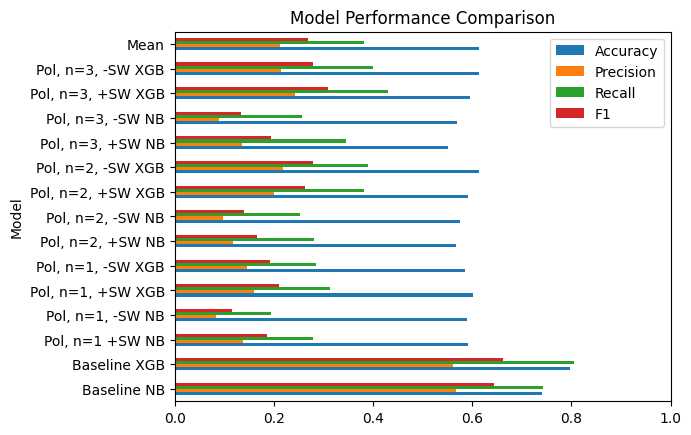

In [111]:
print(results_table)
results_table.plot.barh(x = "Model", y = results_table.columns.values.tolist()[1:],
                        xlim=(0,1), title="Model Performance Comparison")